<a href="https://colab.research.google.com/github/AvantiShri/gcp_analysis_rough/blob/main/cleaner/BulkAnalyze_compare_sumz_squared_to_sum_zsquared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import scipy

In [26]:
blocksizes = [1,2,3,6,12,20,60,300,600,900]

def compare_different_calc_approaches(egg_values):
  #Radin 2023 (Anomalous entropic effects in physical systems associated
  # with collective consciousness) said "All individual samples within a matrix
  # less than 55 or greater than 145 were set to nan" so we do that here
  egg_values = np.where((egg_values < 55), np.nan, egg_values)
  egg_values = np.where((egg_values > 145), np.nan, egg_values)

  num_nonnan_eggs = np.sum(np.isnan(egg_values)==False, axis=1) #get the number of non NaN eggs per row

  egg_zscores = (egg_values - 100)/np.sqrt(50)
  sumz_toz = np.nansum(egg_zscores, axis=1)/np.sqrt(num_nonnan_eggs)

  pval_chi2_for_blocksizes = []
  for blocksize in blocksizes:
    if (len(sumz_toz)%blocksize != 0):
      print("divisibility alert!",len(sumz_toz), blocksize) #divisibility
    block_zs = np.sum(sumz_toz[0:(len(sumz_toz)-(len(sumz_toz)%blocksize))].reshape(-1,blocksize), axis=-1)/np.sqrt(blocksize)
    pval_block_chi2 = 1-scipy.stats.chi2.cdf(x=np.sum(np.square(block_zs)), df=len(block_zs))
    pval_chi2_for_blocksizes.append(pval_block_chi2)

  sumz_toz_squared = np.square(sumz_toz)
  sum_zsquared = np.nansum(np.square(egg_zscores), axis=1)

  sum_sumz_toz_squared = np.sum(sumz_toz_squared)
  df_sum_sumz_squared_toz = len(egg_values)
  pval_sum_sumz_toz_squared = 1-scipy.stats.chi2.cdf(x=sum_sumz_toz_squared, df=df_sum_sumz_squared_toz) #the usual p value

  sum_sum_zsquared = np.sum(sum_zsquared)
  df_sum_sum_zsquared = np.sum(num_nonnan_eggs)
  pval_sum_sum_zsquared = 1-scipy.stats.chi2.cdf(x=sum_sum_zsquared, df=df_sum_sum_zsquared)

  return [pval_sum_sumz_toz_squared, pval_sum_sum_zsquared]+pval_chi2_for_blocksizes

In [27]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import json
event_metadata_list = json.load(open("/content/drive/MyDrive/GCP_data/event_metadata_list.json"))

In [28]:
%matplotlib inline

import glob
import json
import numpy as np
import scipy
import os
from matplotlib import pyplot as plt

%cd /content/drive/MyDrive/GCP_data/

event_count = 0

all_pvals_from_different_approaches = []

for (event, event_name, pval) in event_metadata_list[:]:

  event_count += 1
  print("\n--------------------------------")
  print("Event Count:",event_count,event,event_name,pval)

  egg_values_test = np.load("extracted/"+event+"_test_eggvalues.npy")
  pvals_different_calc_approaches = compare_different_calc_approaches(egg_values_test)
  print(pvals_different_calc_approaches)
  all_pvals_from_different_approaches.append(pvals_different_calc_approaches)



/content/drive/MyDrive/GCP_data

--------------------------------
Event Count: 1 Event391 Internat Day Peace 0.0008192443394802185
[0.0008598426918996482, 0.18189365013767334, 0.0008598426918996482, 0.009053577962607529, 0.006407814412361379, 0.05017676685998662, 0.36933161398714187, 0.4045118249804097, 0.5718219546461178, 0.5679441940315804, 0.7687788043987935, 0.9366465927927545]

--------------------------------
Event Count: 2 Event289 Meditations Valentines Day 0.002569859448349643
[0.0026575696525655834, 0.47128563441626625, 0.0026575696525655834, 0.1307999229172503, 0.022199170358941922, 0.05578258585027451, 0.25787796016457776, 0.48897639002295357, 0.707690964369288, 0.43134487633731555, 0.9154934514434114, 0.8889638532421834]

--------------------------------
Event Count: 3 Event487 September 21 0.003153268038066148
[0.003252951555369199, 0.8959462155130954, 0.003252951555369199, 0.040182372004894495, 0.030234204028552147, 0.2615026152897648, 0.39565987815785364, 0.318848311216

Meta-analysis on sum(sumz_toz_squared), stouffer's z: 6.179826203457219


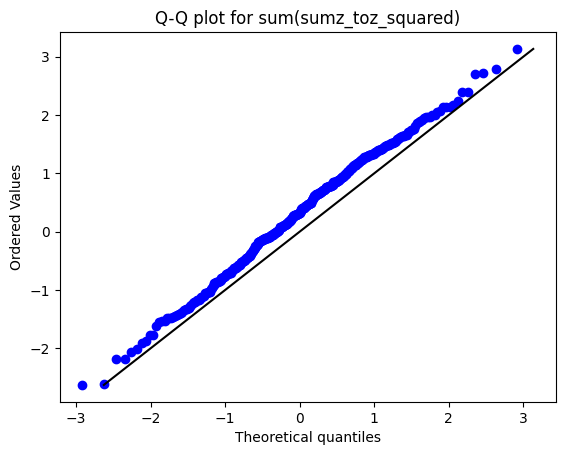

Meta-analysis on sum(sum_zsquared), stouffer's z: 5.476107676012489


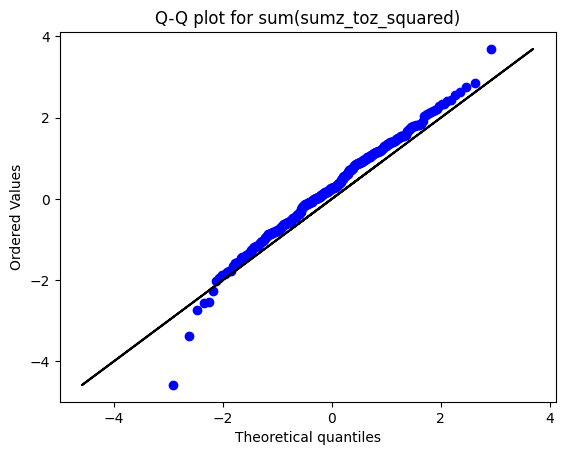

Meta-analysis on 1s_blocks_chi2, stouffer's z: 6.179826203457219


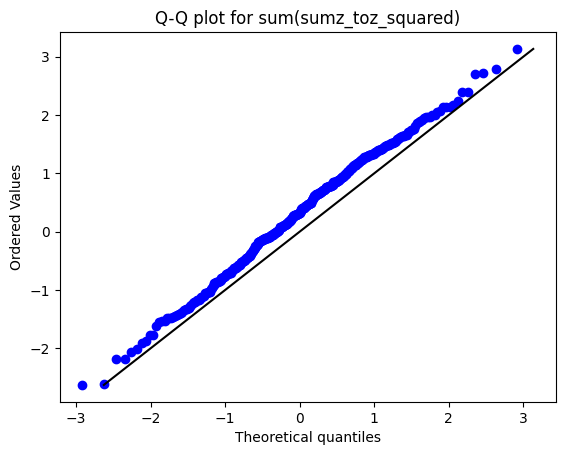

Meta-analysis on 2s_blocks_chi2, stouffer's z: 3.282008093388924


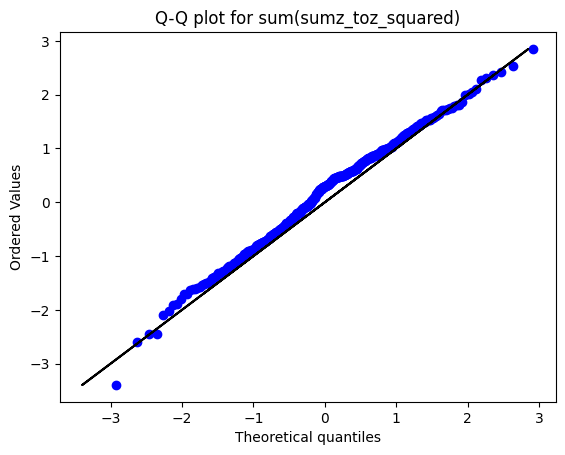

Meta-analysis on 3s_blocks_chi2, stouffer's z: 3.1039008869295546


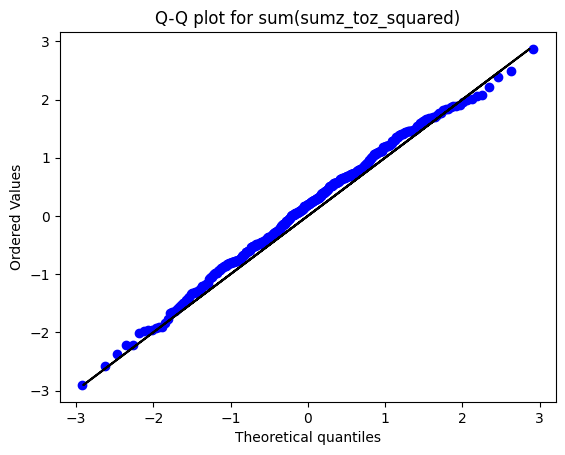

Meta-analysis on 6s_blocks_chi2, stouffer's z: 2.8390778273179627


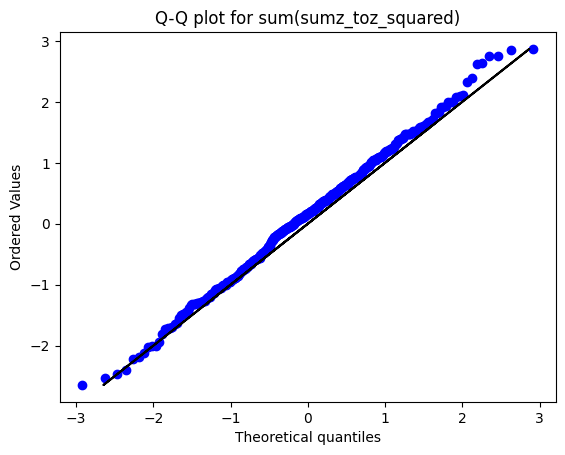

Meta-analysis on 12s_blocks_chi2, stouffer's z: 1.301264413897986


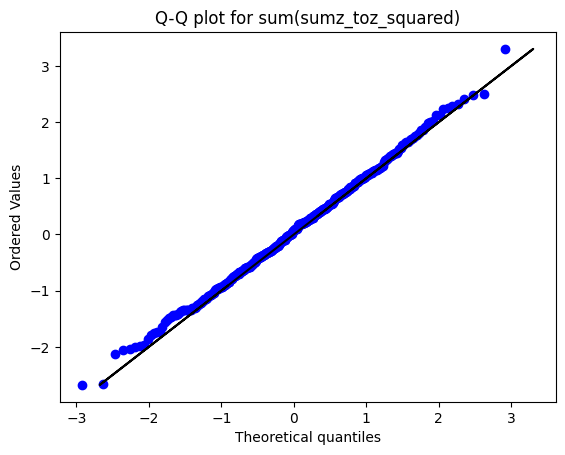

Meta-analysis on 20s_blocks_chi2, stouffer's z: 0.3469911968968348


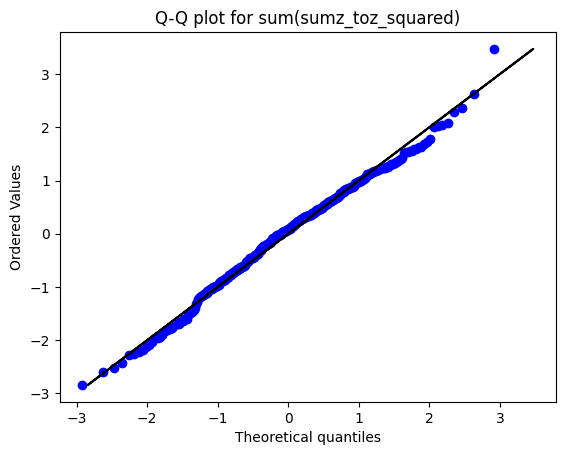

Meta-analysis on 60s_blocks_chi2, stouffer's z: -0.631220008188878


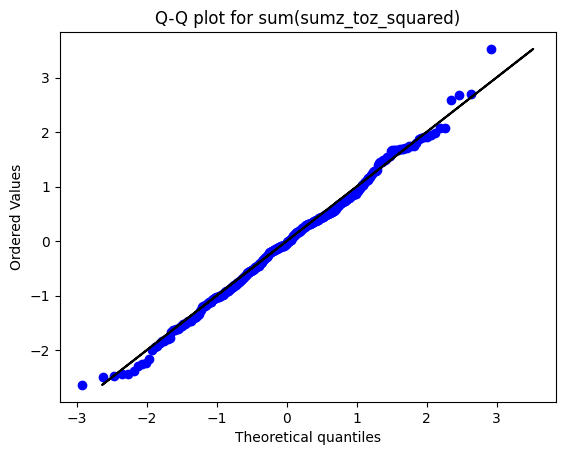

Meta-analysis on 300s_blocks_chi2, stouffer's z: -0.4745510125678035


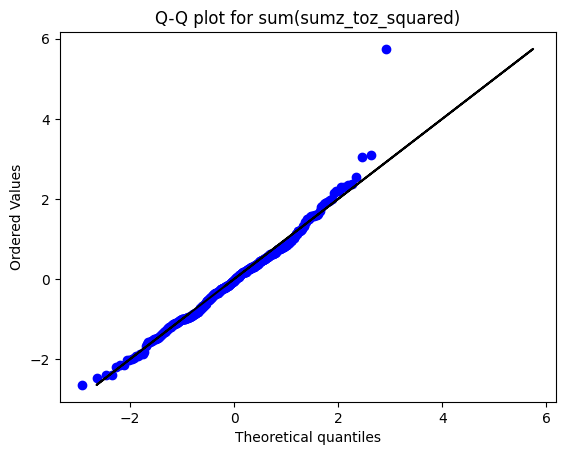

Meta-analysis on 600s_blocks_chi2, stouffer's z: 0.19922648060660628


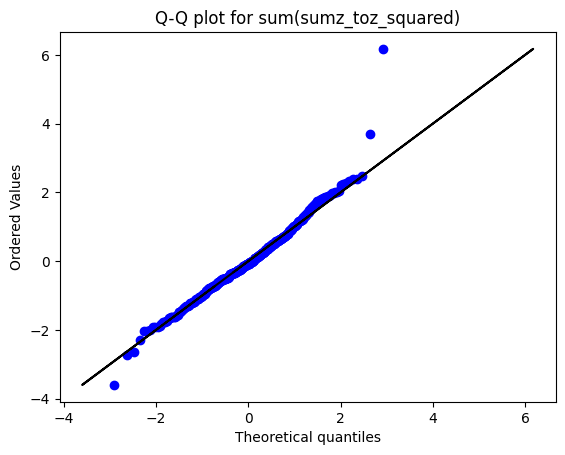

Meta-analysis on 900s_blocks_chi2, stouffer's z: -0.8729709144448627


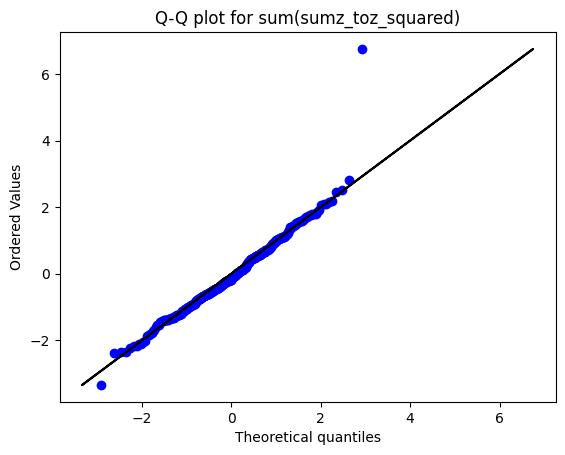

In [29]:
from matplotlib import pyplot as plt

for i,pvalname in enumerate(["sum(sumz_toz_squared)", "sum(sum_zsquared)"]+[str(x)+"s_blocks_chi2" for x in blocksizes]):
  pval_to_zscores = np.array([scipy.stats.norm.ppf(1-x[i]) for x in all_pvals_from_different_approaches])
  print("Meta-analysis on "+pvalname+", stouffer's z:", np.sum(pval_to_zscores)/np.sqrt(len(pval_to_zscores)))
  scipy.stats.probplot(pval_to_zscores, dist=scipy.stats.norm, fit=False, plot=plt)
  plt.plot(pval_to_zscores, pval_to_zscores, color="black")
  plt.title("Q-Q plot for sum(sumz_toz_squared)")
  plt.show()